In [114]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import scale, minmax_scale, robust_scale

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

matplotlib.rc('font',family = "Malgun Gothic")
plt.rc('font',family = 'Malgun Gothic')

plt.rcParams['axes.unicode_minus'] = False

# 1. 회귀분석

In [115]:
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [116]:
df_raw = pd.read_csv("data/체질검사.csv", engine = "python", encoding = 'cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [117]:
df_raw.shape

(252, 14)

신체질량계수(BMI) = 체중(kg)/ [신장(m)]^2

체중단위 lb - > 0.45 kg  
df_raw['HEIGHT'] * 0.45 

신장단위 inch -> 2.54cm  
df_raw['HEIGHT'] * 2.54 * 0.01  

In [118]:
df_raw['BMI'] = (df_raw['WEIGHT']*0.45) / (df_raw['HEIGHT']*2.54*0.01)**2
df_raw[['BMI']]

,BMI
0,48.523870
1,23.082595
2,26.422478
3,23.838617
4,37.293165
...,...
247,29.537049
248,26.139558
249,26.060228
250,24.935981


In [119]:
df_raw

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.537049
248,23.6,43,170.75,67.50,37.4,103.7,89.7,94.2,58.5,39.0,24.1,33.8,28.8,18.8,26.139558
249,20.9,35,162.75,66.00,36.4,99.1,92.8,99.2,63.1,38.7,21.7,31.1,26.4,16.9,26.060228
250,17.0,56,167.75,68.50,37.4,98.6,93.0,97.0,55.4,38.8,23.2,32.4,29.7,19.0,24.935981


In [120]:
df_raw.shape

(252, 15)

In [121]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FAT      252 non-null    float64
 1   AGE      252 non-null    int64  
 2   WEIGHT   252 non-null    float64
 3   HEIGHT   252 non-null    float64
 4   NECK     252 non-null    float64
 5   CHEST    252 non-null    float64
 6   ABDOMEN  252 non-null    float64
 7   HIP      252 non-null    float64
 8   THIGH    252 non-null    float64
 9   KNEE     252 non-null    float64
 10  ANKLE    252 non-null    float64
 11  BICEPS   252 non-null    float64
 12  FOREARM  252 non-null    float64
 13  WRIST    252 non-null    float64
 14  BMI      252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


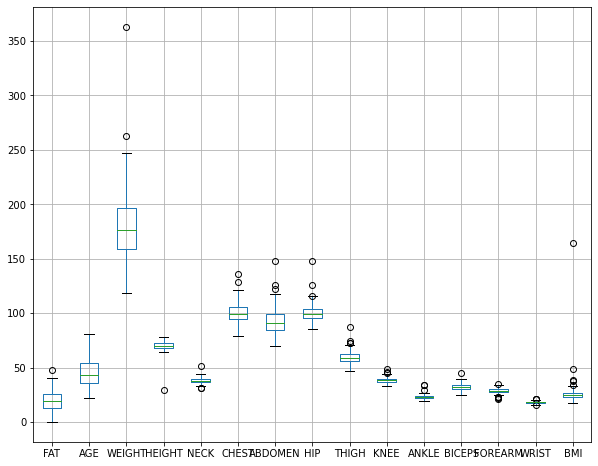

In [122]:
#이상치확인 
df_raw.boxplot(figsize=(10,8))

In [123]:
# 이상치 BMI 데이터 제거하고 나머지 df_raw로 저장하기 
df_raw= df_raw[df_raw['BMI']<150]
df_raw[['BMI']]

,BMI
0,48.523870
1,23.082595
2,26.422478
3,23.838617
4,37.293165
...,...
247,29.537049
248,26.139558
249,26.060228
250,24.935981


In [124]:
# 이상치 WEIGHT 데이터 제거하고 나머지 df_raw로 저장하기 
df_raw= df_raw[df_raw['WEIGHT']<350]
df_raw[['WEIGHT']]

,WEIGHT
1,168.00
2,177.75
3,147.75
4,219.00
5,202.25
...,...
247,207.50
248,170.75
249,162.75
250,167.75


In [102]:
#sns.scatterplot(x="BMI",y="FAT",data =df_raw)

In [125]:
# 상관관계 분석 
#df_raw.corr(method="pearson").round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI
FAT,1.000,0.295,0.617,-0.029,0.489,0.701,0.824,0.633,0.549,0.492,0.245,0.482,0.365,0.339,0.745
AGE,0.295,1.000,-0.016,-0.246,0.119,0.182,0.243,-0.058,-0.216,0.017,-0.110,-0.044,-0.085,0.218,0.124
WEIGHT,0.617,-0.016,1.000,0.513,0.810,0.891,0.874,0.933,0.852,0.843,0.581,0.785,0.683,0.725,0.867
HEIGHT,-0.029,-0.246,0.513,1.000,0.325,0.224,0.187,0.397,0.350,0.513,0.395,0.319,0.322,0.397,0.022
NECK,0.489,0.119,0.810,0.325,1.000,0.769,0.728,0.708,0.669,0.648,0.434,0.709,0.661,0.731,0.752
CHEST,0.701,0.182,0.891,0.224,0.769,1.000,0.910,0.825,0.708,0.698,0.447,0.707,0.599,0.644,0.911
ABDOMEN,0.824,0.243,0.874,0.187,0.728,0.910,1.000,0.861,0.737,0.710,0.407,0.656,0.530,0.602,0.914
HIP,0.633,-0.058,0.933,0.397,0.708,0.825,0.861,1.000,0.881,0.809,0.521,0.722,0.603,0.626,0.861
THIGH,0.549,-0.216,0.852,0.350,0.669,0.708,0.737,0.881,1.000,0.777,0.504,0.744,0.604,0.544,0.787
KNEE,0.492,0.017,0.843,0.513,0.648,0.698,0.710,0.809,0.777,1.000,0.585,0.654,0.579,0.656,0.679


In [126]:
# 설명 변수간의 다중공선성 확인  
df_raw_x = df_raw.drop("FAT",axis =1)
df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
10,ANKLE,1.829
1,AGE,2.290
12,FOREARM,2.448
13,WRIST,3.273
11,BICEPS,3.411
4,NECK,3.979
9,KNEE,4.538
8,THIGH,7.169
5,CHEST,10.950
6,ABDOMEN,12.344


=> 10보다 훨씬 큰 WEIGHT, HEIGHT 제거  
WEIGHT, HEIGHT의 값으로 이루어진 BMI는 보류

In [127]:
#다중공선성 재확인
df_raw_x = df_raw.drop(["FAT","WEIGHT","HEIGHT"],axis = 1) 
df_raw_x_const = add_constant(df_raw_x)

df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values,i)for i in range(df_raw_x_const.shape[1])]
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
8,ANKLE,1.760
1,AGE,2.071
10,FOREARM,2.414
11,WRIST,3.101
9,BICEPS,3.294
2,NECK,3.682
7,KNEE,4.108
6,THIGH,7.061
3,CHEST,8.839
5,HIP,9.744


In [128]:
#회귀모델생성
reg_model = smf.ols(formula = "FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + THIGH + KNEE + ANKLE +BICEPS + FOREARM +WRIST +BMI", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     59.44
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.81e-64
Time:                        20:52:49   Log-Likelihood:                -709.53
No. Observations:                 250   AIC:                             1445.
Df Residuals:                     237   BIC:                             1491.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      7.592      0.441      0.6

In [129]:
#후진제거법을 이용한 변수선택
df_raw_y = df_raw["FAT"] 

model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_raw_x,df_raw_y)

selected_cols = df_raw_x.columns[rfe.support_]

removed_cols = df_raw_x.columns[~rfe.support_]


print("Selected Variables :{}".format(selected_cols))
print("Removed Variables :{}".format(removed_cols))

Selected Variables :Index(['NECK', 'ABDOMEN', 'HIP', 'WRIST', 'BMI'], dtype='object')
Removed Variables :Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM'], dtype='object')


In [132]:
#회귀모델생성
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + WRIST + BMI", data = df_raw)
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     135.7
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           2.20e-68
Time:                        20:54:57   Log-Likelihood:                -716.86
No. Observations:                 250   AIC:                             1446.
Df Residuals:                     244   BIC:                             1467.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2123      7.024      0.600      0.5

※최종모델회귀식  
Y = 4.2124 -0.4648 NECK + 0.8518 ABDOMEN -0.3078 HIP -1.5072 WRIST + 0.4773 BMI

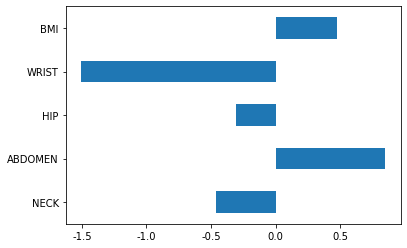

In [133]:
#변수중요도 확인
df_reg_coef = pd.DataFrame({'Coef':rfe_reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y="Coef",legend = False)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.4467
Date:                Tue, 17 Nov 2020   Prob (F-statistic):              0.815
Time:                        21:03:49   Log-Likelihood:                -875.87
No. Observations:                 248   AIC:                             1764.
Df Residuals:                     242   BIC:                             1785.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.0507      0.532     35.826      0.0

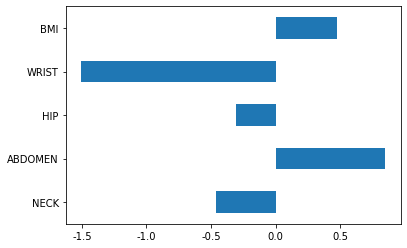

In [139]:
#표준화 회귀계수를 이용한 변수 중요도 확인 
scaler = StandardScaler()
cols = df_raw_x.columns
np_scaled = scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(np_scaled,columns = cols)

df_scaled["FAT"]=df_raw["FAT"]
reg_model_scaled=smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + WRIST + BMI",data =df_scaled)
reg_result_scaled=reg_model_scaled.fit()
print(reg_result_scaled.summary())

df_reg_coef = pd.DataFrame({'coef':rfe_reg_result.params.values[1:]},index = selected_cols)
df_reg_coef.plot.barh(y="coef",legend = False)

※결론   
WRIST(손목두께)의 중요성은 줄어들었지만, 여전히 중요도는 크다.  
WRIST, ABDOMEN, NECK, BMI, HIP 순으로 FAT에 영향을 준다. 

# 2.의사결정나무

콘크리트 강도를 예측하는 의사결정나무 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라. 
데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)
 -.목표변수(Concrete_compressive_strength)


※ 데이터는 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 (train_test_split 활용)
 0. train_test_split 함수를 이용하여 train:test로 데이터 분할. 분할된 train 데이터를 재 분할하여 validation 데이터로 사용
 1. train 데이터: 모델 훈련 
 2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)
 3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)

In [245]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [173]:
df_raw = pd.read_csv("data/Concrete.csv", engine = "python", encoding = 'cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [174]:
# 데이터 분할 4:3:3
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis = 1, inplace =False)

In [179]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
val data X size : (309, 8)
val data Y size : (309,)
test data X size : (309, 8)
test data Y size : (309,)


In [180]:
#모델생성
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on val set : {:.3f}".format(tree_uncustomized.score(df_val_x,df_val_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set : 1.000
Score on val set : 0.685
Score on test set : 0.705


In [183]:
#모델 parameter조정 - min_sample_leaf : 입사귀 노드의 최소 자료 수 변경에 따른 모델 성능
train_score = []; val_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf :
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf =v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    val_score.append(tree.score(df_val_x, df_val_y))

df_score_leaf =pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=val_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.685
1,2,0.984,0.688
2,3,0.962,0.688
3,4,0.948,0.718
4,5,0.918,0.681
5,6,0.908,0.678
6,7,0.889,0.679
7,8,0.876,0.671
8,9,0.862,0.659
9,10,0.857,0.663


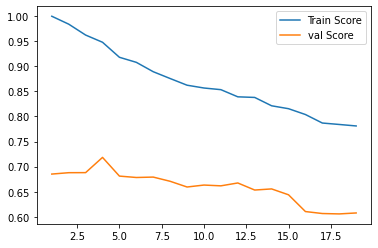

In [184]:
plt.plot(para_leaf,train_score,linestyle = "-",label = "Train Score")
plt.plot(para_leaf,val_score,linestyle = "-",label = "val Score")
plt.legend()

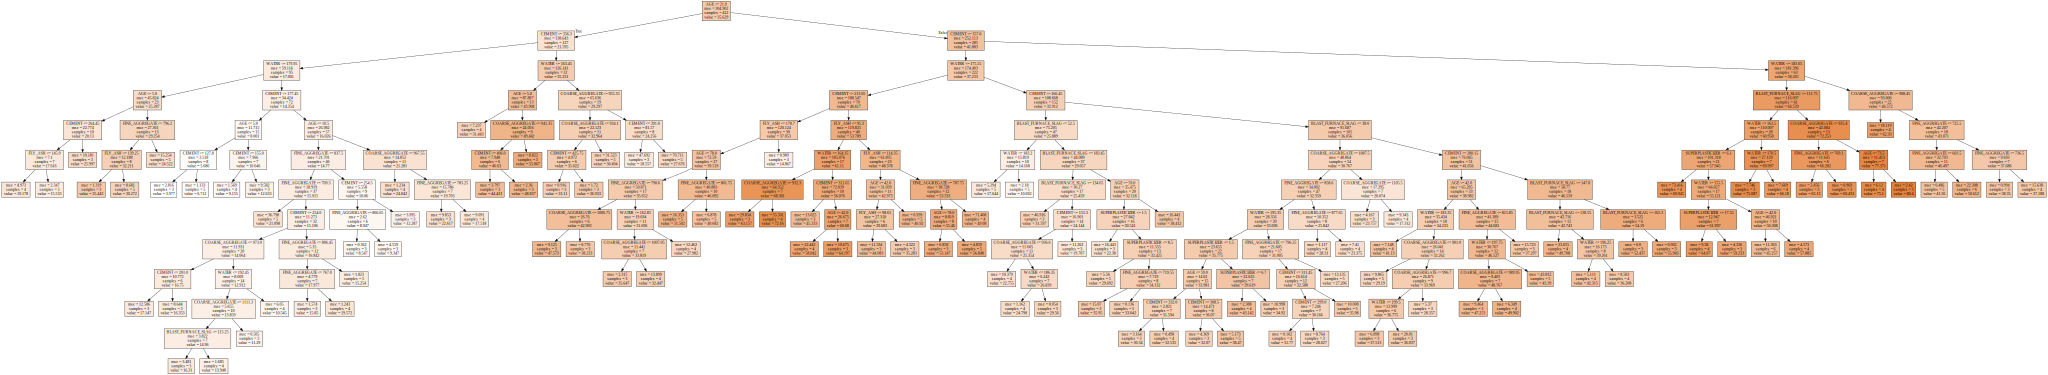

In [187]:
#min_samples_leaf = 3
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 3)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_leaf.dot") as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

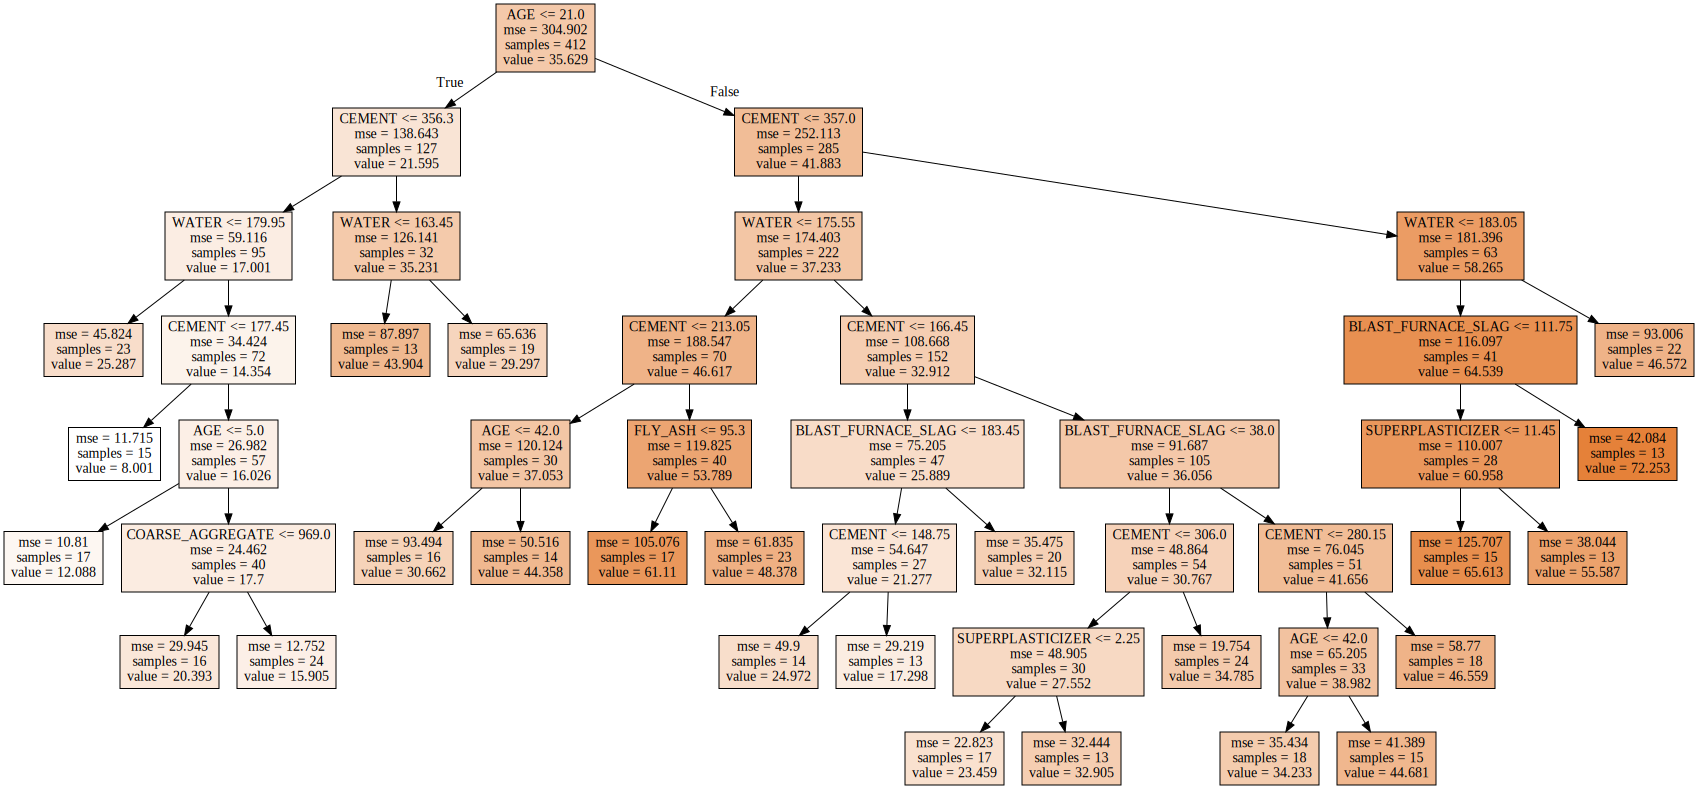

In [186]:
#min_samples_leaf = 13
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 13)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_leaf.dot") as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

=> min_samples_leaf = 3 인경우가 13인 경우보다 의사결정나무의 불균형이 심해보임   
따라서, min_samples_leaf = 13 선택

In [195]:
train_score = []; val_score =[]
para_split = [n_split * 2 for n_split in range(1,20)]

for v_min_samples_split in para_split :
    tree = DecisionTreeRegressor(random_state=1234,min_samples_leaf =13\
                                 ,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    val_score.append(tree.score(df_val_x, df_val_y))

    
df_score_split =pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=val_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.838,0.653
1,4,0.838,0.653
2,6,0.838,0.653
3,8,0.838,0.653
4,10,0.838,0.653
5,12,0.838,0.653
6,14,0.838,0.653
7,16,0.838,0.653
8,18,0.838,0.653
9,20,0.838,0.653


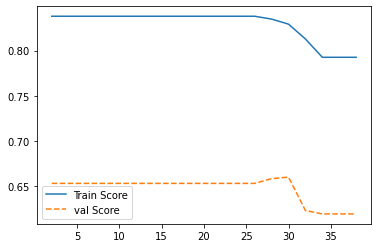

In [196]:
plt.plot(para_split,train_score,linestyle = "-", label = "Train Score")
plt.plot(para_split,val_score,linestyle = "--", label = "val Score")
plt.legend()

min_samples_split = 29,31 비교

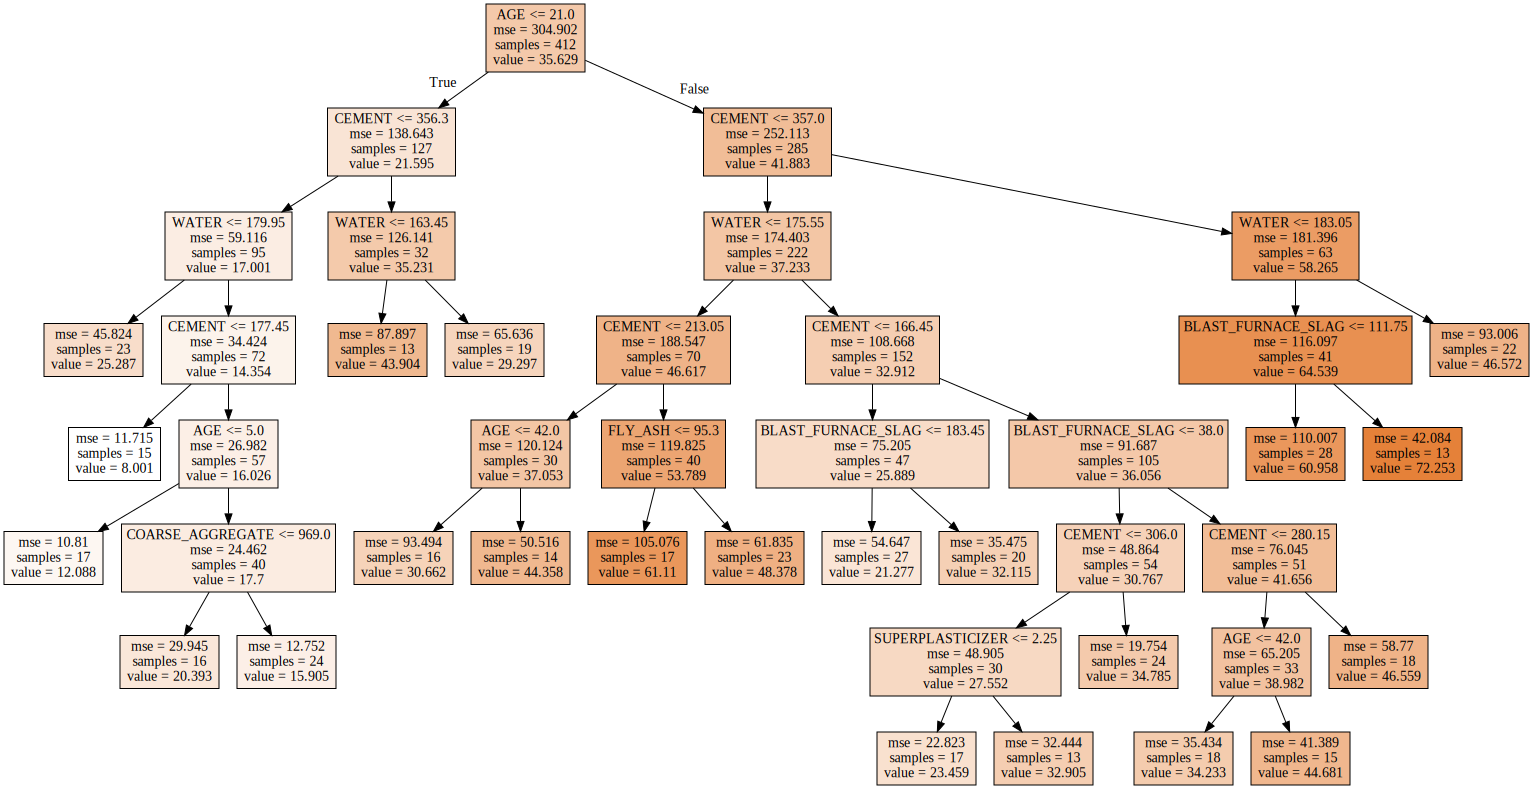

In [197]:
# min_samples_split=29 인경우 
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 13\
                                   ,min_samples_split=29)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot"\
                ,feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_split.dot") as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

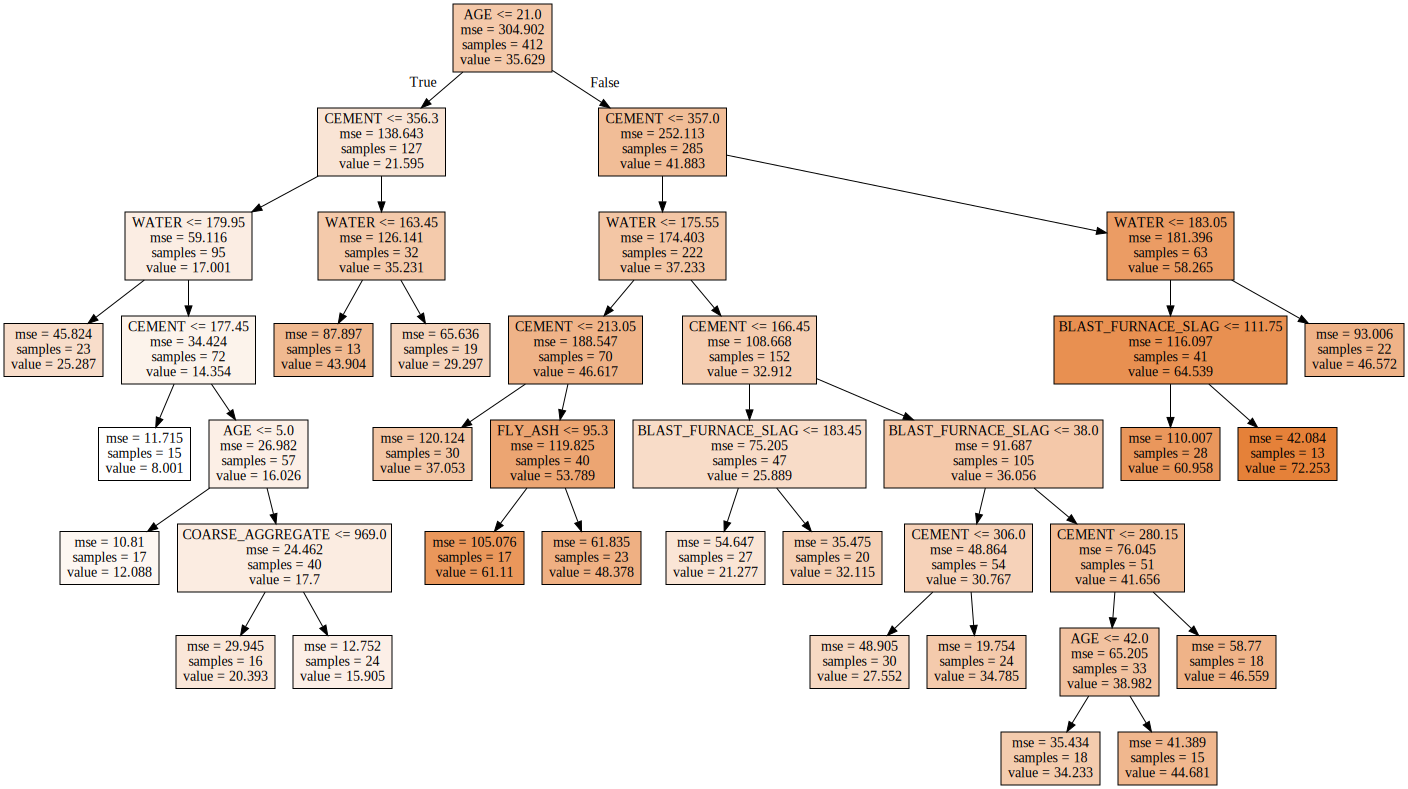

In [199]:
# min_samples_split=31
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 13\
                                   ,min_samples_split=31)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_split.dot"\
                ,feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_split.dot") as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

=> min_samples_split = 31 인경우가 29인 경우보다 의사결정나무의 불균형이 심해보임   
따라서, min_samples_split = 29 선택

In [201]:
train_score = []; val_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf =13\
                                 , min_samples_split=29,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    val_score.append(tree.score(df_val_x, df_val_y))

    
df_score_depth =pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=val_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.288,0.190
1,2,0.524,0.400
2,3,0.662,0.482
3,4,0.742,0.565
4,5,0.804,0.613
5,6,0.817,0.632
6,7,0.829,0.660
7,8,0.829,0.660
8,9,0.829,0.660
9,10,0.829,0.660


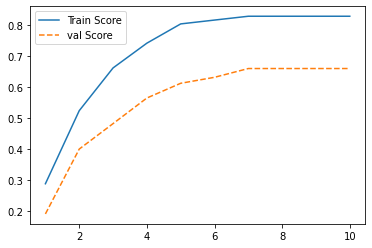

In [202]:
plt.plot(para_depth,train_score,linestyle = "-", label = "Train Score")
plt.plot(para_depth,val_score,linestyle = "--", label = "val Score")
plt.legend()

max_depth = 1, 7 일 경우

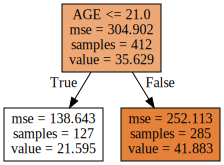

In [203]:
# max_depth =1 인경우
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 13\
                                   ,min_samples_split=29,max_depth=1)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_depth.dot",feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_depth.dot") as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

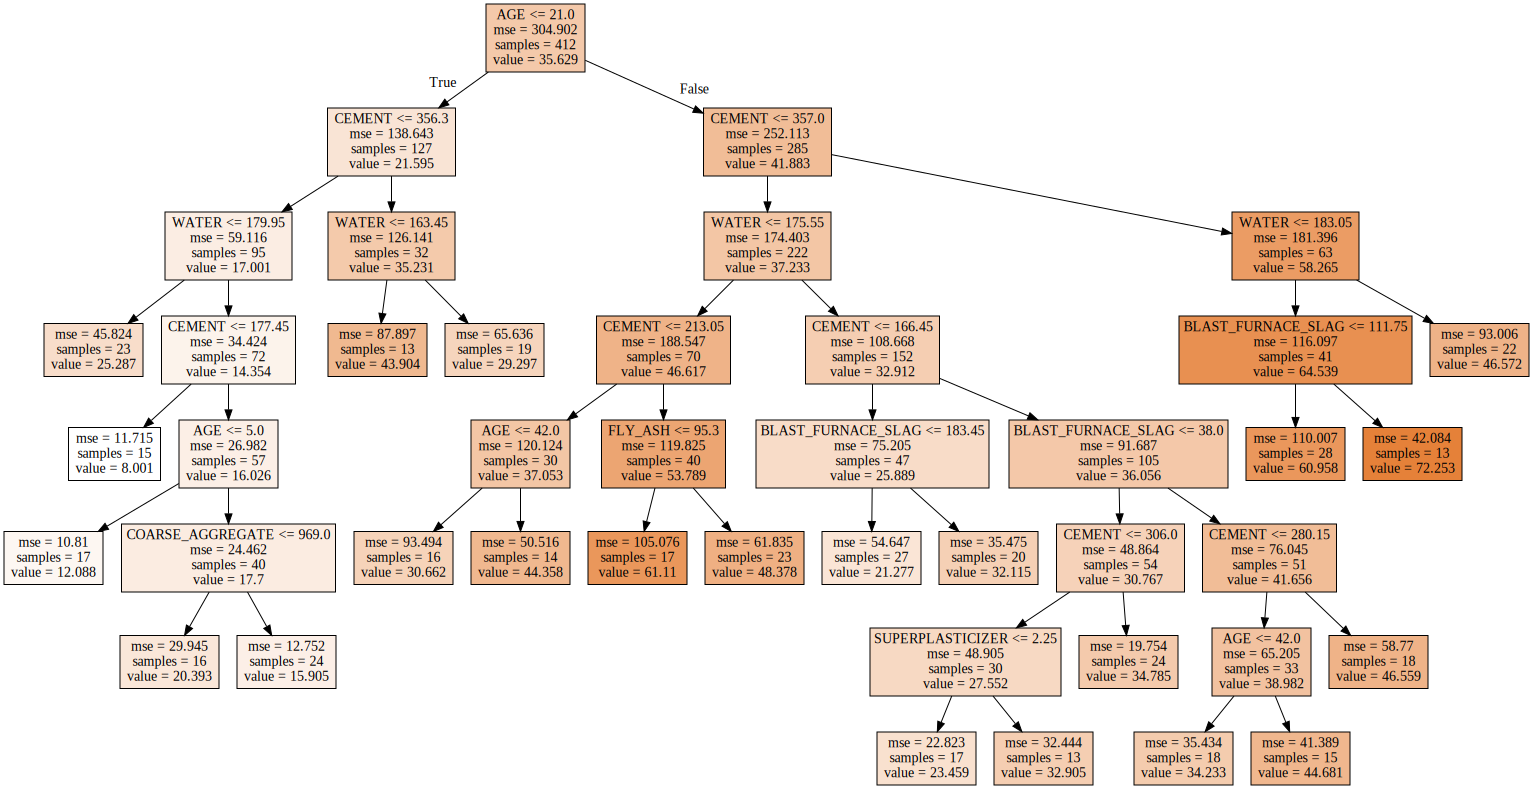

In [204]:
# max_depth =7 인경우
tree_graph = DecisionTreeRegressor(random_state=1234,min_samples_leaf = 13\
                                   ,min_samples_split=29, max_depth=7)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file="tree_depth.dot",feature_names=v_feature_name, impurity=True,filled=True)
with open("tree_depth.dot") as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

=> max_depth =1 인경우는 분리노드수가 매우 적음  
따라서, max_depth =7 선택

In [206]:
#최종모델
tree_final=DecisionTreeRegressor(min_samples_leaf = 13\
                                 ,min_samples_split=29,max_depth=7, random_state=1234)
tree_final.fit(df_test_x,df_test_y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=13, min_samples_split=29,
                      random_state=1234)

In [208]:
import graphviz

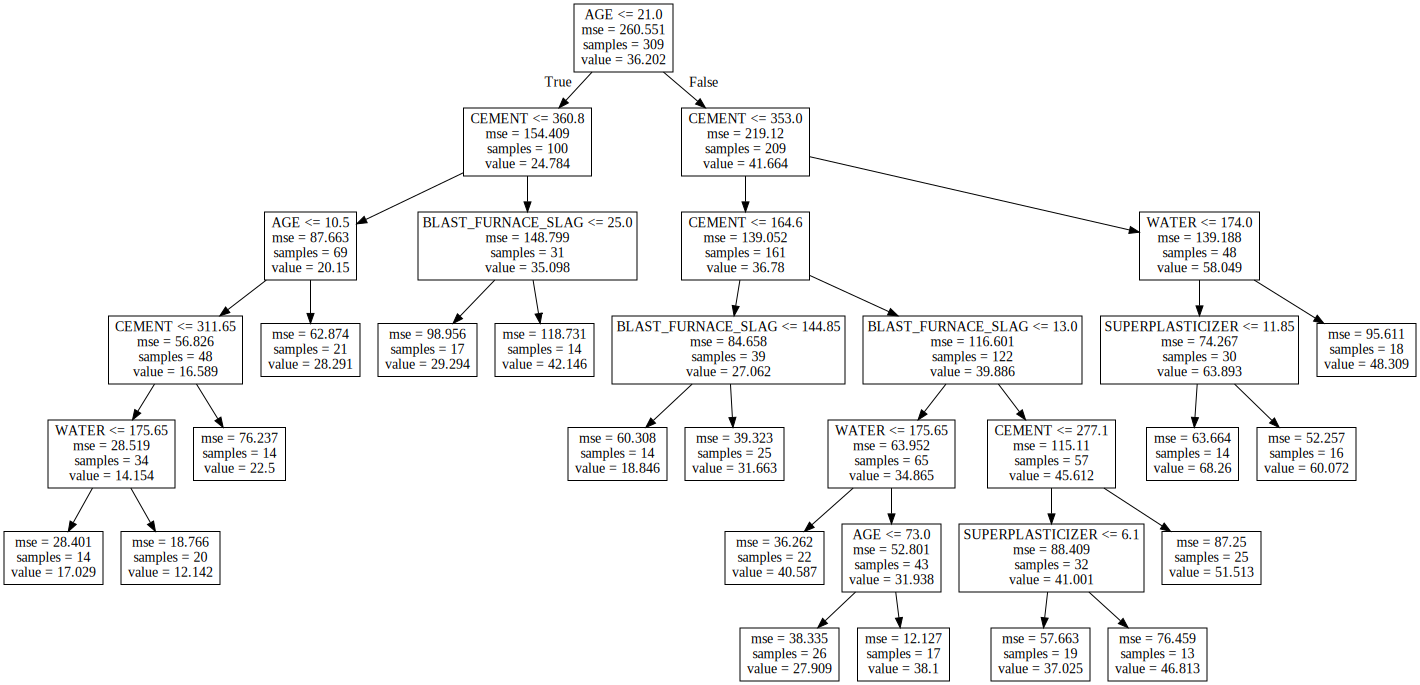

In [213]:
# 최종모델시각화 
export_graphviz(tree_final,out_file="tree_final.dot"\
                ,feature_names = v_feature_name,impurity = True)

with open("tree_final.dot")as f :
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [216]:
#tree.feature_importances_ : 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
0,CEMENT,0.458
7,AGE,0.358
1,BLAST_FURNACE_SLAG,0.100
3,WATER,0.064
4,SUPERPLASTICIZER,0.020
2,FLY_ASH,0.000
5,COARSE_AGGREGATE,0.000
6,FINE_AGGREGATE,0.000


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runtim

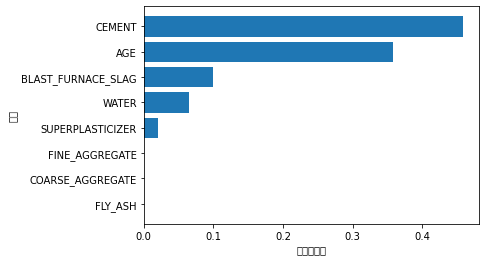

In [217]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width= df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

※ 결론 : CEMENT, AGE, BLAST_FURNACE_SLAG , WATER, SUPERPLASTICZER 순으로 영향을 준다.

# 3.랜덤포레스트

콘크리트 강도를 예측하는 랜덤 포레스트 모델을 만들고 predict method를 이용하여 예측값을 구하라. 그리고 모델의 mse와 mae를 산출하여 비교하라..
데이터 : Concrete.CSV(변수: 9개, 자료 수: 1,030개)
 -.목표변수(Concrete_compressive_strength
 
 ※ 데이터는 ( train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 (train_test_split 활용)
 0. train_test_split 함수를 이용하여 train:test로 데이터 분할. 분할된 train 데이터를 재 분할하여 validation 데이터로 사용
 1. train 데이터: 모델 훈련 
 2. validation 데이터: 최적의 parameter 찾기(과정의 [연습/실습]에서 test 데이터 역할)
 3. test 데이터: 2에서 찾은 최적의 parameter를 이용하여 만든 모델로 최종 성능 확인(단 한 번만 사용할 것)

In [218]:
df_raw = pd.read_csv("data/Concrete.csv", engine = "python", encoding = 'cp949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [219]:
# 데이터 분할 4:3:3
df_raw_y = df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis = 1, inplace =False)

In [220]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,df_raw_y,test_size = 3/10,random_state =1234)
df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x,df_train_y,test_size = 3/7,random_state =1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("val data X size : {}".format(df_val_x.shape))
print("val data Y size : {}".format(df_val_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
val data X size : (309, 8)
val data Y size : (309,)
test data X size : (309, 8)
test data Y size : (309,)


In [221]:
from sklearn.ensemble import RandomForestRegressor

In [222]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print("Score in training set : {:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
print("Score in val set : {:.3f}".format(rf_uncustomized.score(df_val_x,df_val_y)))

Score in training set : 0.982
Score in val set : 0.821


In [226]:
train_score = []; val_score =[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree :
    rf =  RandomForestRegressor(n_estimators =v_n_estimators, random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

    
df_score_n =pd.DataFrame()
df_score_n['n_estimators']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['ValScore']=val_score

df_score_n.round(3)

,n_estimators,TrainScore,ValScore
0,10,0.975,0.789
1,20,0.979,0.806
2,30,0.981,0.808
3,40,0.982,0.813
4,50,0.982,0.812
5,60,0.983,0.816
6,70,0.982,0.817
7,80,0.982,0.816
8,90,0.982,0.820
9,100,0.982,0.821


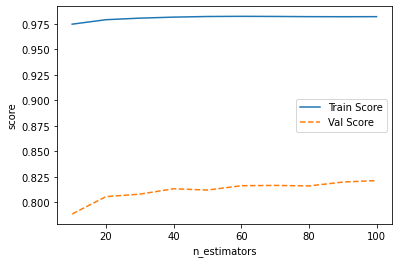

In [227]:
plt.plot(para_n_tree,train_score,linestyle = "-", label = "Train Score")
plt.plot(para_n_tree,val_score,linestyle = "--", label = "Val Score")
plt.ylabel("score");plt.xlabel("n_estimators")
plt.legend()

In [229]:
# n_estimators = 100 일 경우
train_score = []; val_score =[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    rf =  RandomForestRegressor(random_state=1234, n_estimators = 100\
                                ,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

    
df_score_leaf =pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['ValScore']=val_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValScore
0,1,0.982,0.821
1,2,0.969,0.810
2,3,0.952,0.803
3,4,0.936,0.790
4,5,0.922,0.778
5,6,0.908,0.768
6,7,0.895,0.755
7,8,0.882,0.748
8,9,0.870,0.741
9,10,0.862,0.733


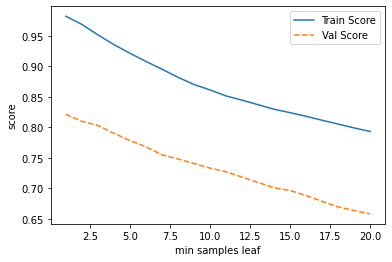

In [230]:
plt.plot(para_leaf,train_score,linestyle = "-", label = "Train Score")
plt.plot(para_leaf,val_score,linestyle = "--", label = "Val Score")
plt.ylabel("score");plt.xlabel("min samples leaf")
plt.legend()

min_samples_leaf=6 선택

In [231]:
train_score = []; val_score =[]
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split :
    rf =  RandomForestRegressor(random_state=1234, n_estimators = 100\
                                ,min_samples_leaf=6\
                                , min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

    
df_score_split =pd.DataFrame()
df_score_split['MinSamplesSplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['ValScore']=val_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,ValScore
0,1,0.982,0.821
1,2,0.969,0.810
2,3,0.952,0.803
3,4,0.936,0.790
4,5,0.922,0.778
5,6,0.908,0.768
6,7,0.895,0.755
7,8,0.882,0.748
8,9,0.870,0.741
9,10,0.862,0.733


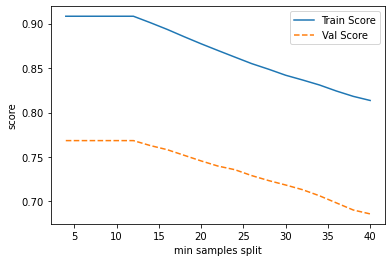

In [232]:
plt.plot(para_split,train_score,linestyle = "-", label = "Train Score")
plt.plot(para_split,val_score,linestyle = "--", label = "Val Score")
plt.ylabel("score");plt.xlabel("min samples split")
plt.legend()

min samples split = 13 일경우 선택

In [234]:
train_score = []; val_score =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf =  RandomForestRegressor(random_state=1234, n_estimators = 100\
                                ,min_samples_leaf=6, min_samples_split=13\
                                , max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    val_score.append(rf.score(df_val_x, df_val_y))

    
df_score_depth =pd.DataFrame()
df_score_depth['Depth']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['ValScore']=val_score

df_score_depth.round(3)

,Depth,TrainScore,ValScore
0,1,0.435,0.324
1,2,0.650,0.516
2,3,0.758,0.623
3,4,0.834,0.700
4,5,0.877,0.740
5,6,0.896,0.756
6,7,0.903,0.762
7,8,0.904,0.765
8,9,0.905,0.765
9,10,0.905,0.765


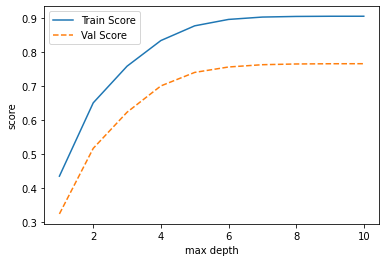

In [235]:
plt.plot(para_depth,train_score,linestyle = "-", label = "Train Score")
plt.plot(para_depth,val_score,linestyle = "--", label = "Val Score")
plt.ylabel("score");plt.xlabel("max depth")
plt.legend()

max_depth = 4 로 설정 

In [236]:
# 최종모델생성
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100\
                                 ,min_samples_leaf=6\
                                 ,min_samples_split=13,max_depth=4)
rf_final.fit(df_train_x,df_train_y)
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x,df_test_y)))

Score on training set : 0.834
Score on test set : 0.757


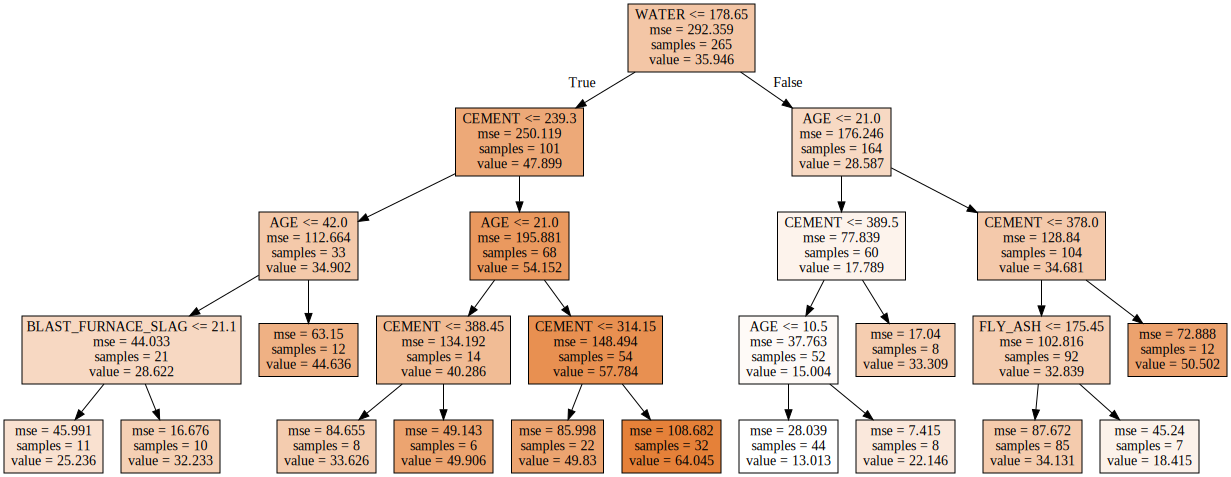

In [237]:
#변수명 저장
v_feature_name = df_train_x.columns
export_graphviz(rf_final.estimators_[0],out_file="rfr_final_0.dot"\
                ,feature_names =v_feature_name,\
                impurity=True,filled = True)

with open("rfr_final_0.dot")as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

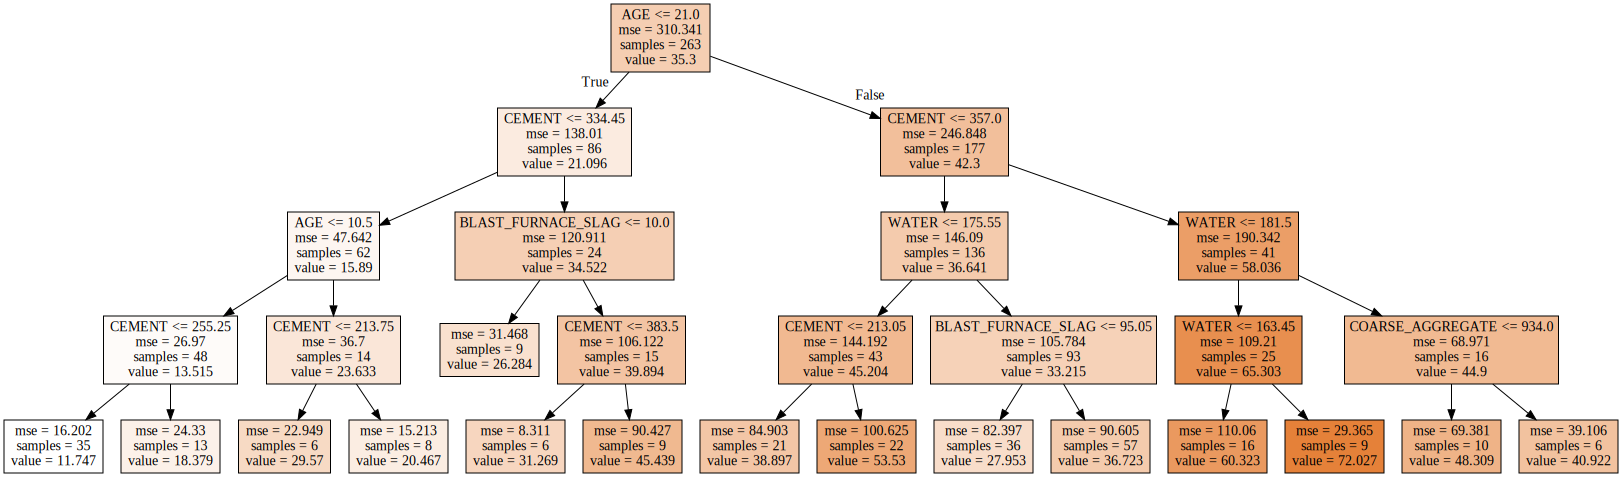

In [238]:
# 1번 트리 저장
export_graphviz(rf_final.estimators_[1],out_file="rfr_final_1.dot"\
                ,feature_names =v_feature_name,impurity=True,filled = True)

with open("rfr_final_1.dot")as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

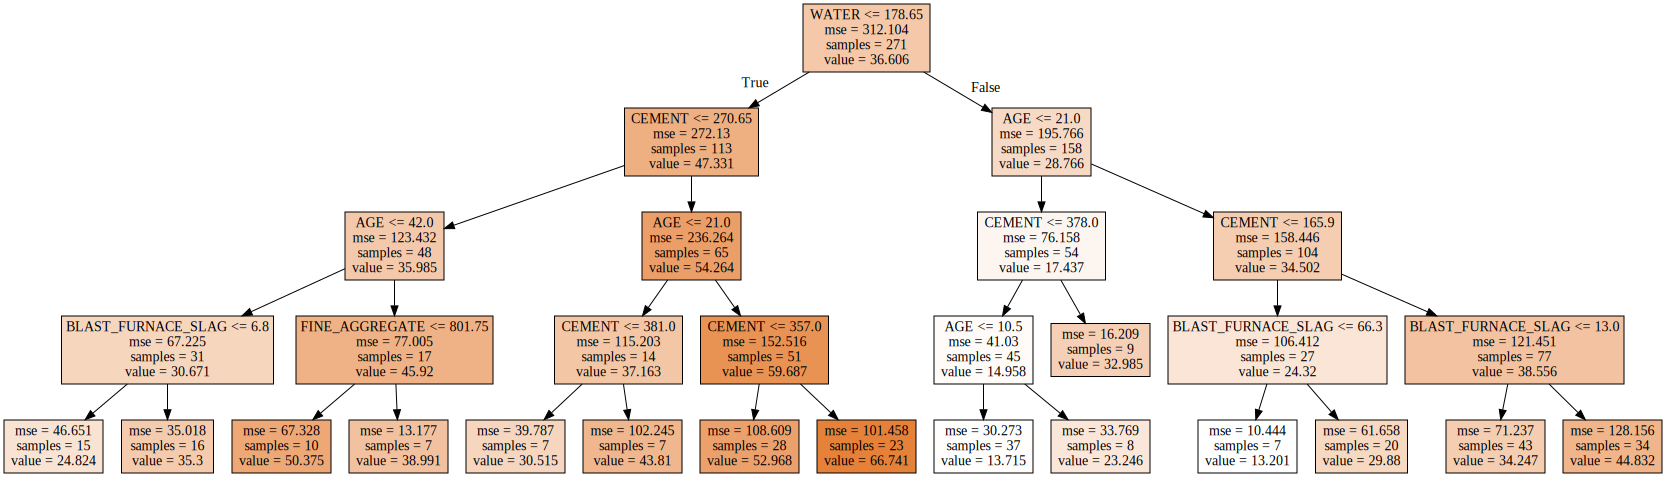

In [239]:
# 10번 트리 저장
export_graphviz(rf_final.estimators_[10],out_file="rfr_final_10.dot"\
                ,feature_names =v_feature_name,impurity=True,filled = True)

with open("rfr_final_10.dot")as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [240]:
df_importance = pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace =True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.359
0,CEMENT,0.311
3,WATER,0.250
1,BLAST_FURNACE_SLAG,0.036
6,FINE_AGGREGATE,0.015
4,SUPERPLASTICIZER,0.012
2,FLY_ASH,0.011
5,COARSE_AGGREGATE,0.006


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runtim

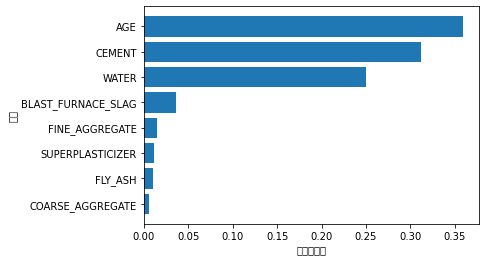

In [241]:
df_importance.sort_values("Importance",ascending=True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

※결론 : AGE , CEMENT, WATER 순으로 영향을 준다고 해석할 수 있다.